# **Exploratory Data Analysis**

Exploratory Data Analysis is a block in the data science workflow between data cleaning and data modeling with the goal to understand patterns, detect mistakes, check assumptions and check relationships between variables of a data set with the help of graphical charts and summary statistics.

# Upload Libraries

In [ ]:
# to handle datasets
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# statistics
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


# Upload file

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving swmotorcycle_ClaimNb.csv to swmotorcycle_ClaimNb.csv


In [ ]:
# Reading File
df = pd.read_csv('swmotorcycle_ClaimNb.csv')

# Data set Overview

In [ ]:
# Dimensions of data set
print(df.shape)

(64548, 8)


In [ ]:
# List types for each attribute
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64548 entries, 0 to 64547
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OwnerAge    64548 non-null  int64  
 1   Gender      64548 non-null  object 
 2   Area        64548 non-null  object 
 3   RiskClass   64548 non-null  object 
 4   VehAge      64548 non-null  int64  
 5   BonusClass  64548 non-null  object 
 6   Exposure    64548 non-null  float64
 7   ClaimNb     64548 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.9+ MB
None


In [ ]:
# Take a peek at the first rows of the data
df.head()

,OwnerAge,Gender,Area,RiskClass,VehAge,BonusClass,Exposure,ClaimNb
0,0,Male,Central parts of Sweden's three largest cities,EV ratio 13-15,12,BM1,0.175342,0
1,4,Male,Lesser towns except Gotland; Northern towns,EV ratio 20-24,9,BM1,0.000000,0
2,5,Female,Lesser towns except Gotland; Northern towns,EV ratio 9-12,18,BM1,0.454795,0
3,5,Female,Small towns; countryside except Gotland; North...,EV ratio <5,25,BM1,0.172603,0
4,6,Female,Suburbs; middle-sized cities,EV ratio <5,26,BM1,0.180822,0


# Data Cleaning

In [ ]:
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[]
(64548, 8)


In [ ]:
# get number of unique values for each row
counts = df.duplicated()
# record rows to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
print(df.shape)

[]
(64548, 8)


In [ ]:
# Check missing values both to numeric features and categorical features 
missing = df.isnull().sum()/df.shape[0]*100
missing

OwnerAge      0.0
Gender        0.0
Area          0.0
RiskClass     0.0
VehAge        0.0
BonusClass    0.0
Exposure      0.0
ClaimNb       0.0
dtype: float64

# Summary Statistics

In [ ]:
# Summarize attribute distributions for data type of variables
obj_cols = [var for var in df.columns if df[var].dtype=='object']
df[obj_cols].describe().T

,count,unique,top,freq
Gender,64548,2,Male,54695
Area,64548,7,Small towns; countryside except Gotland; North...,24816
RiskClass,64548,7,EV ratio 9-12,18905
BonusClass,64548,7,BM7,17953


In [ ]:
# Summarize attribute distributions for data type of variables
no_obj_cols = [var for var in df.columns if df[var].dtype!='object']
df[no_obj_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
OwnerAge,64548.0,42.416062,12.980960,0.0,31.000000,44.000000,52.0,92.00000
VehAge,64548.0,12.540063,9.727445,0.0,5.000000,12.000000,16.0,99.00000
Exposure,64548.0,1.010671,1.307424,0.0,0.463014,0.827397,1.0,31.33973
ClaimNb,64548.0,0.010798,0.107323,0.0,0.000000,0.000000,0.0,2.00000


In [ ]:
# Split data set between target variable and features
X_full = df.copy()
y = X_full.ClaimNb
X_full.drop(['ClaimNb'], axis=1, inplace=True)

# Target Variable Analysis

In [ ]:
# Univariate analysis looking at Mean, Variance, Standard Deviation, Skewness and Kurtosis
print(y.name,
      '\nMean :', np.mean(y),
      '\nVariance :', np.var(y),
      '\nStandard Deviation :', np.var(y)**0.5, 
      '\nSkewness :', stats.skew(y), 
      '\nKurtosis :', stats.kurtosis(y))

ClaimNb 
Mean : 0.010798165706141167 
Variance : 0.011518152049681164 
Standard Deviation : 0.10732265394445463 
Skewness : 10.462687865766773 
Kurtosis : 118.26200717739627


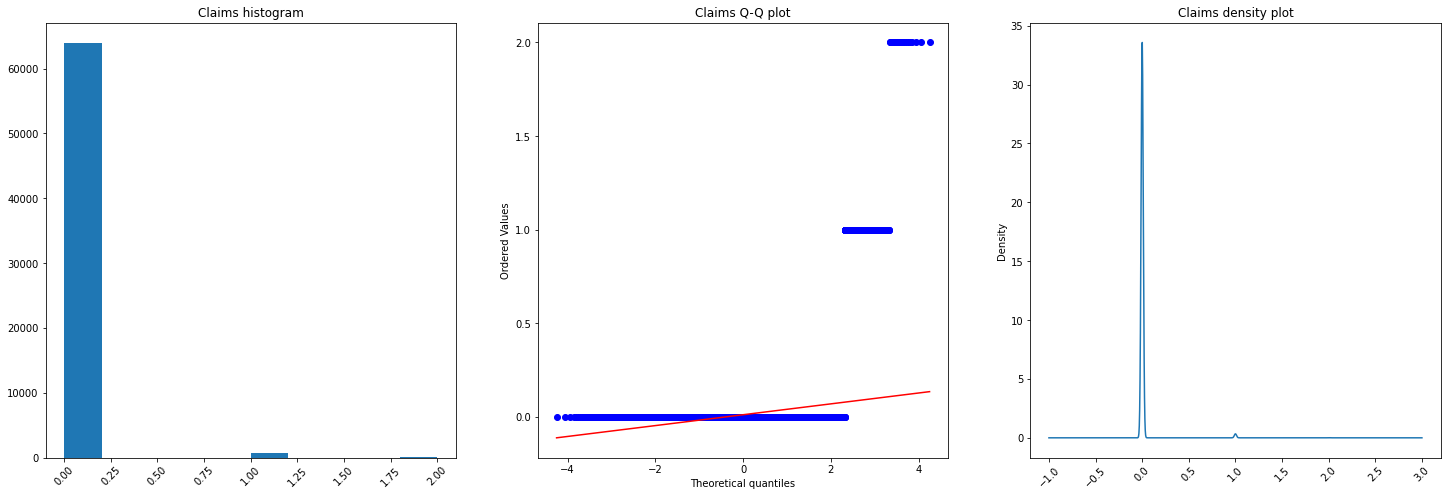

In [ ]:
# Univariate analysis with density plots and histogram
fig = plt.figure(figsize = (25,8))
plt.subplot(1,3,1)  
plt.hist(df['ClaimNb'], bins=10)
plt.xticks(rotation=45)
plt.title('Claims histogram')
# Univariate analysis with QQ-plot
plt.subplot(1,3,2)  
res = stats.probplot(y, plot=plt)
plt.title('Claims Q-Q plot')
# Univariate analysis with density plot
plt.subplot(1,3,3)
df['ClaimNb'].plot(kind='density')
plt.xticks(rotation=45)
plt.title('Claims density plot') 
plt.show()

# Numerical Features Analysis

In [ ]:
# Select numerical columns
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['float64','int64']]

In [ ]:
# Subset with numerical features
num = X_full[numerical_cols]
num.columns

Index(['OwnerAge', 'VehAge', 'Exposure'], dtype='object')

In [ ]:
# Univariate analysis looking at Mean, Standard Deviation, Skewness and Kurtosis
for col in num:
    print(col,
        '\nMean :', np.mean(num[col]),  
        '\nVariance :', np.var(num[col]),
        '\nStandard Deviation :', np.var(num[col])**0.5, 
        '\nSkewness :', stats.skew(num[col]), 
        '\nKurtosis :', stats.kurtosis(num[col]))

OwnerAge 
Mean : 42.41606246514222 
Variance : 168.502699176367 
Standard Deviation : 12.98085895371978 
Skewness : 0.01923230691615634 
Kurtosis : -0.7209156107313563
VehAge 
Mean : 12.540063208774866 
Variance : 94.62172951202372 
Standard Deviation : 9.727370123112603 
Skewness : 1.7210040577972723 
Kurtosis : 5.033623862712162
Exposure 
Mean : 1.010671296198178 
Variance : 1.7093305177651694 
Standard Deviation : 1.3074136750719603 
Skewness : 6.784285624699394 
Kurtosis : 78.63564102170989


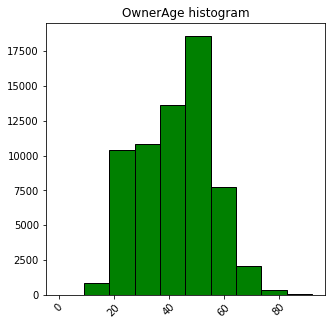

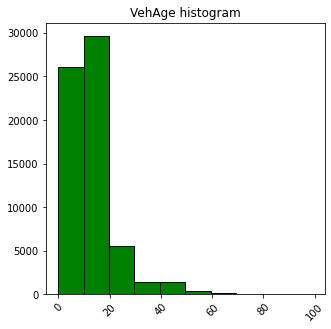

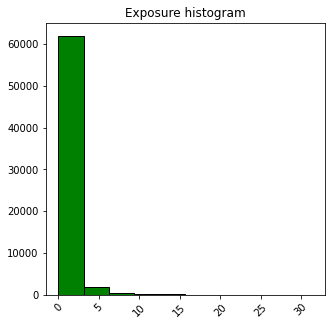

In [ ]:
# Univariate analysis with histograms
for col in num:
    plt.figure(figsize=(5,5))
    x=num[col]
    plt.hist(x,color='green',edgecolor='black')
    plt.title('{} histogram'.format(col))
    plt.xticks(rotation=45)
    plt.show()

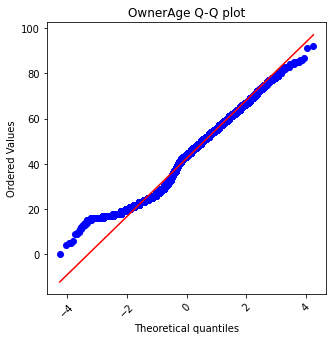

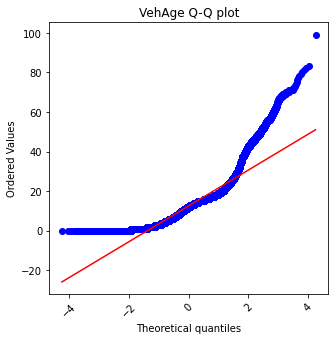

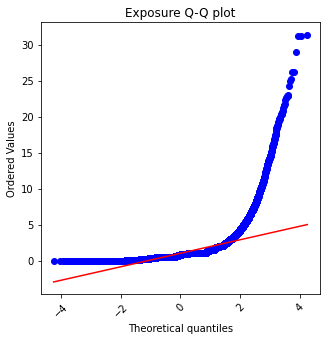

In [ ]:
# Univariate analysis with Q-Q plot
for col in num:
    plt.figure(figsize=(5,5))
    x=num[col]
    res = stats.probplot(x, plot=plt)
    plt.title('{} Q-Q plot'.format(col))
    plt.xticks(rotation=45)
    plt.show()

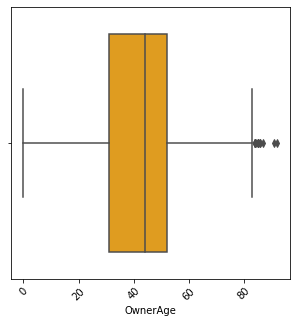

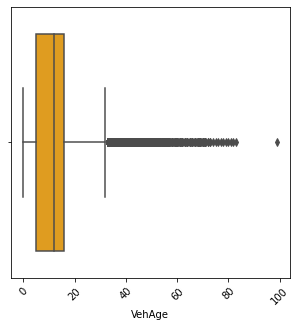

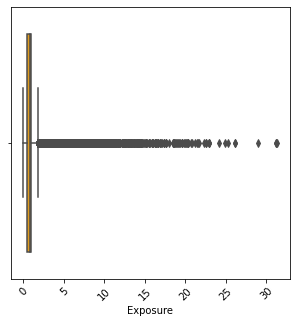

In [ ]:
# Univariate analysis with box-plots
for col in num:
    plt.figure(figsize=(5,5))
    x=num[col]
    sns.boxplot(x, color="orange")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# new subset for a bivariate analysis
num2 = pd.concat([y,num], axis=1)

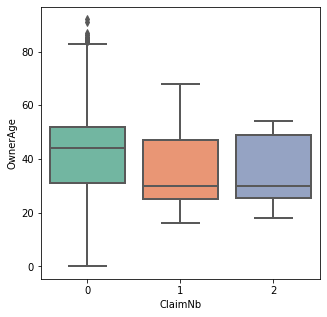

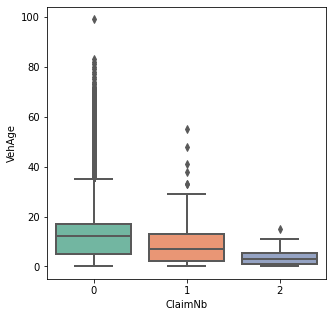

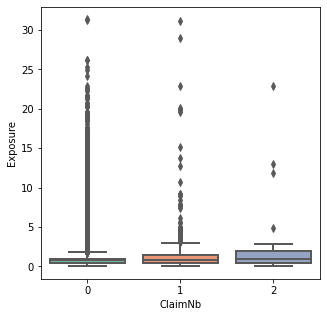

In [ ]:
# Bivariate analysis with box-plots
for col in num:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=col, x=y, data=num2, linewidth=2, palette="Set2")
    plt.show()

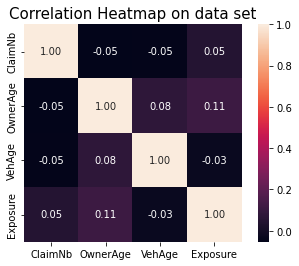

In [ ]:
# Correlation heatmap
corr_matrix = num2.corr()
sns.heatmap(corr_matrix, square = True, annot=True, fmt='.2f')
plt.title('Correlation Heatmap on data set',size=15)
plt.yticks(fontsize="10")
plt.xticks(fontsize="10")
plt.show()


# Categorical Features Analysis

In [ ]:
# let's have a look at how many labels for categorical features
for col in X_full.columns:
    if X_full[col].dtype =="object":
        print(col, ': ', len(X_full[col].unique()), ' labels')

Gender :  2  labels
Area :  7  labels
RiskClass :  7  labels
BonusClass :  7  labels


In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

In [ ]:
# Subset with categorical features
cat = X_full[categorical_cols]
cat.columns

Index(['Gender', 'Area', 'RiskClass', 'BonusClass'], dtype='object')

In [ ]:
# Univariate analysis looking at frequency
for col in cat:
    count = pd.crosstab(index = cat[col], columns="count")
    percentage = pd.crosstab(index = cat[col], columns="frequency")/pd.crosstab(index = cat[col], columns="frequency").sum()
    tab = pd.concat([count, percentage], axis=1)
    print('\n',tab)


 col_0   count  frequency
Gender                  
Female   9853   0.152646
Male    54695   0.847354

 col_0                                               count  frequency
Area                                                                
Central parts of Sweden's three largest cities       8582   0.132955
Gotland (Sweden's largest island)                     373   0.005779
Lesser towns except Gotland; Northern towns         12722   0.197094
Northern countryside                                 3884   0.060172
Northern towns                                       2377   0.036825
Small towns; countryside except Gotland; Northe...  24816   0.384458
Suburbs; middle-sized cities                        11794   0.182717

 col_0           count  frequency
RiskClass                       
EV ratio 13-15  12378   0.191764
EV ratio 16-19  11816   0.183058
EV ratio 20-24   8407   0.130244
EV ratio 6-8     5204   0.080622
EV ratio 9-12   18905   0.292883
EV ratio <5      7032   0.108942
EV ratio 

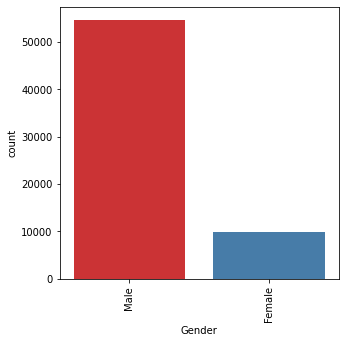

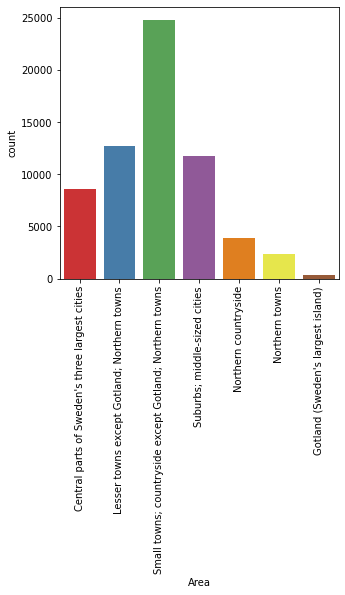

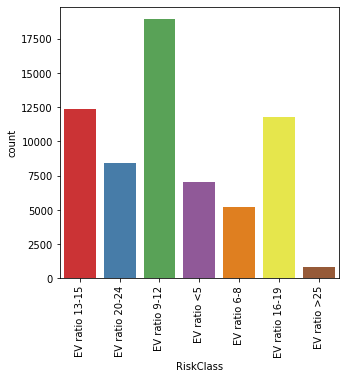

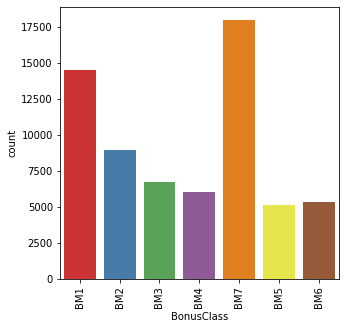

In [ ]:
# Univariate analysis with barplots
for col in cat:
    plt.figure(figsize=(5,5))
    sns.countplot(x=cat[col], data=cat, palette="Set1")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# new subset for a bivariate analysis
cat2 = pd.concat([y,cat], axis=1)

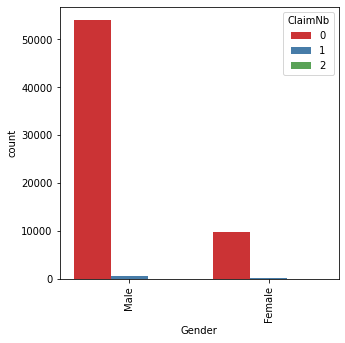

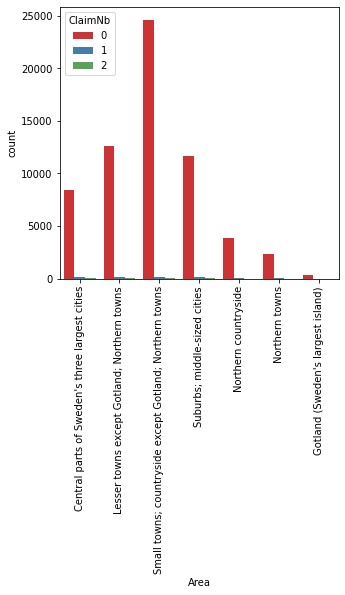

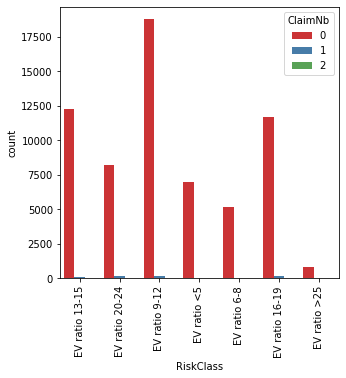

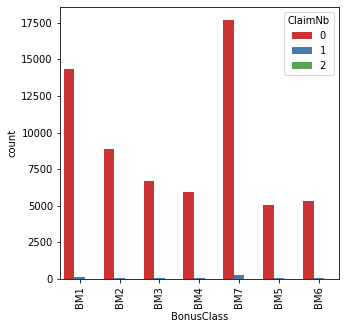

In [ ]:
# bivariate analysis with barplot
for col in cat:
    plt.figure(figsize=(5,5))
    sns.countplot(x=cat[col], hue=y, data=cat, palette="Set1")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Function for query and barplot about Claims per each class of variable
def query(data,col):
    # groupby
    df = data.groupby(data[col], as_index=False)['ClaimNb'].sum()
    df['PERCENTAGE'] = df['ClaimNb']/df['ClaimNb'].sum()*100
    # dropping not matching rows
    df = df.dropna()
    # ranking 
    df = df.sort_values(by = 'ClaimNb', ascending = False).reset_index(drop=True)
    df_q = df.style.background_gradient(cmap='winter').format({'PERCENTAGE': "{:.2f}"}).format({'ClaimNb':"{:,.2f}"})
    # barplot
    index=list(df.columns[0:1])
    barplot = df[df.columns[0:2]].sort_values(by = "ClaimNb", ascending = True).set_index(index).plot.barh()
    plt.xticks(rotation=0)
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
    return df_q
    plt.show()
    return barplot
    plt.show()

ClaimNb per Gender


,Gender,ClaimNb,PERCENTAGE
0,Male,636.00,91.248207
1,Female,61.00,8.751793


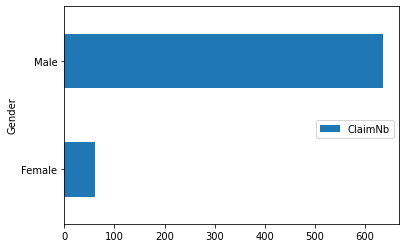

In [ ]:
# query and barplot
variable = 'Gender'
print('ClaimNb per {}'.format(variable))
query(cat2, col='Gender')

ClaimNb per Area


,Area,ClaimNb,PERCENTAGE
0,Small towns; countryside except Gotland; Northern towns,196.00,28.120516
1,Central parts of Sweden's three largest cities,183.00,26.255380
2,Suburbs; middle-sized cities,167.00,23.959828
3,Lesser towns except Gotland; Northern towns,123.00,17.647059
4,Northern countryside,18.00,2.582496
5,Northern towns,9.00,1.291248
6,Gotland (Sweden's largest island),1.00,0.143472


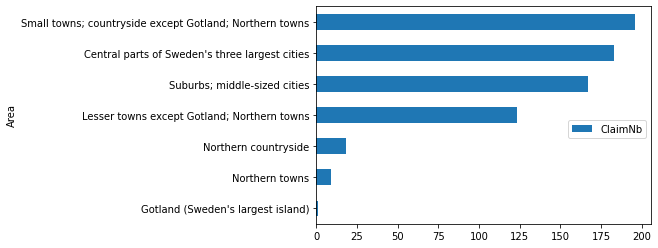

In [ ]:
# query and barplot
variable = 'Area'
print('ClaimNb per {}'.format(variable))
query(cat2, col='Area')

ClaimNb per RiskClass


,RiskClass,ClaimNb,PERCENTAGE
0,EV ratio 20-24,175.00,25.107604
1,EV ratio 9-12,166.00,23.816356
2,EV ratio 16-19,149.00,21.377331
3,EV ratio 13-15,98.00,14.060258
4,EV ratio 6-8,57.00,8.177905
5,EV ratio <5,46.00,6.599713
6,EV ratio >25,6.00,0.860832


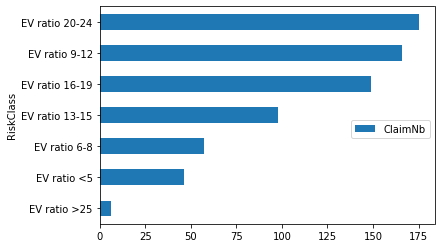

In [ ]:
# query and barplot
variable = 'RiskClass'
print('ClaimNb per {}'.format(variable))
query(cat2, col='RiskClass')

ClaimNb per BonusClass


,BonusClass,ClaimNb,PERCENTAGE
0,BM7,281.00,40.315638
1,BM1,135.00,19.368723
2,BM2,72.00,10.329986
3,BM4,64.00,9.182209
4,BM3,57.00,8.177905
5,BM5,45.00,6.456241
6,BM6,43.00,6.169297


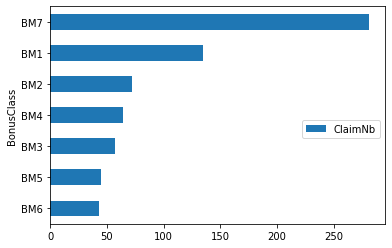

In [ ]:
# query and barplot
variable = 'BonusClass'
print('ClaimNb per {}'.format(variable))
query(cat2, col='BonusClass')